# Bayesian Theory and Computation
# Project 1

**Naman Chhibbar** *MA21BTECH11011* \
**Abhay Gupta** *BM21BTECH11001*

## Installing and Importing dependencies

In [1]:
# Uncomment the line below to install dependencies
# !pip install numpy scipy pandas matplotlib

In [2]:
from warnings import filterwarnings

import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt

# Ignore warnings
filterwarnings("ignore")

# Seed for reproducibility
np.random.seed(69)

# Float precision while printing
flt_prec = 4

## Loading the Data

In [3]:
# Path to csv file
data_path = "/Users/naman/Workspace/Data/Bayesian-Theory/cbb.csv"

In [4]:
df = pd.read_csv(data_path)
df.tail()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
3518,Toledo,MAC,34,27,119.9,109.6,0.7369,56.3,52.9,13.6,...,27.5,54.6,52.1,39.7,36.1,69.5,-1.2,NaN,NaN,2023
3519,Liberty,ASun,33,27,111.4,97.3,0.8246,55.5,49.3,16.0,...,27.8,56.4,48.6,36.4,33.6,64.4,-2.0,NaN,NaN,2023
3520,Utah Valley,WAC,34,28,107.1,94.6,0.8065,51.7,44.0,19.3,...,28.7,52.5,42.8,33.4,31.1,69.8,-0.3,NaN,NaN,2023
3521,UAB,CUSA,38,29,112.4,97.0,0.8453,50.3,47.3,17.3,...,28.9,48.8,47.2,35.6,31.6,70.7,-0.5,NaN,NaN,2023
3522,North Texas,CUSA,36,31,110.0,93.8,0.8622,51.2,44.5,19.8,...,40.2,49.6,44.2,35.7,30.1,58.7,1.1,NaN,NaN,2023


In [5]:
# Extract column of interest
data = df[["TEAM", "G", "W", "YEAR"]].dropna()
data.tail()

,TEAM,G,W,YEAR
3518,Toledo,34,27,2023
3519,Liberty,33,27,2023
3520,Utah Valley,34,28,2023
3521,UAB,38,29,2023
3522,North Texas,36,31,2023


In [6]:
teams = data["TEAM"].unique()
print(f"Number of unique teams: {len(teams)}")

Number of unique teams: 368


## Binomial Model and Bayesian Analysis of Winning Probability

We model the number of games won by a given team using the binomial distribution $\text{Binomial}(n, \pi)$, where $n$ is the known number of games held that year and $\pi$ is the unknown probability that the given team wins a match.

Hence, if $n$ games are held in some year:

$$
\mathbb{P}(X = x | \pi) = \binom{n}{x} \pi^x (1 - \pi)^{n - x} \qquad x \in \{0, 1, \dots, n\}
$$

For binomial data, the conjugate prior for $\pi$ is the beta distribution.
Given the prior $\pi \sim \text{Beta}(\alpha, \beta)$ and the data $\bar{x} = (x_1, x_2, \dots, x_m)$, the posterior will be $\pi | \bar{x} \sim \text{Beta}(\alpha + \sum_i x_i, \beta + nm - \sum_i x_i)$

In [7]:
# Choose a random state
team = np.random.choice(teams)

print(f"Team: {team}")

Team: New Hampshire


### Progression of $\pi$ Distribution

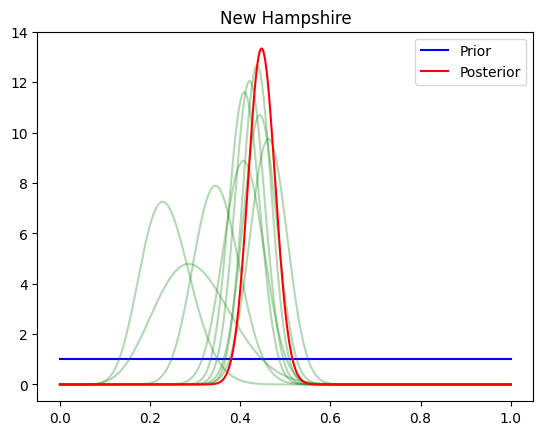

In [8]:
# Prior alpha and beta
alpha_prior, beta_prior = 1, 1

# Get years
years = data["YEAR"].unique()
years.sort()
max_year = years[-1]

# Pi grid
pi_grid = np.linspace(0, 1, 1000)

# Plot prior
color = "blue"
prior_vals = st.beta.pdf(pi_grid, alpha_prior, beta_prior)
plt.title(team)
plt.plot(pi_grid, prior_vals, label="Prior", color=color)

for year in years:
  
  filt = (data["TEAM"] == team) & (data["YEAR"] == year)

  wins = data[filt]["W"].sum()
  games = data[filt]["G"].sum()

  alpha_post = alpha_prior + wins
  beta_post = beta_prior + games - wins

  post_vals = st.beta.pdf(pi_grid, alpha_post, beta_post)

  post_color = "red" if year == max_year else "green"
  post_alpha = 1 if year == max_year else .3
  post_label = "Posterior" if year == max_year else ""
  plt.plot(pi_grid, post_vals, label=post_label, color=post_color, alpha=post_alpha)

  alpha_prior, beta_prior = alpha_post, beta_post

plt.legend()
plt.show()

### Posterior Distribution for Different Years

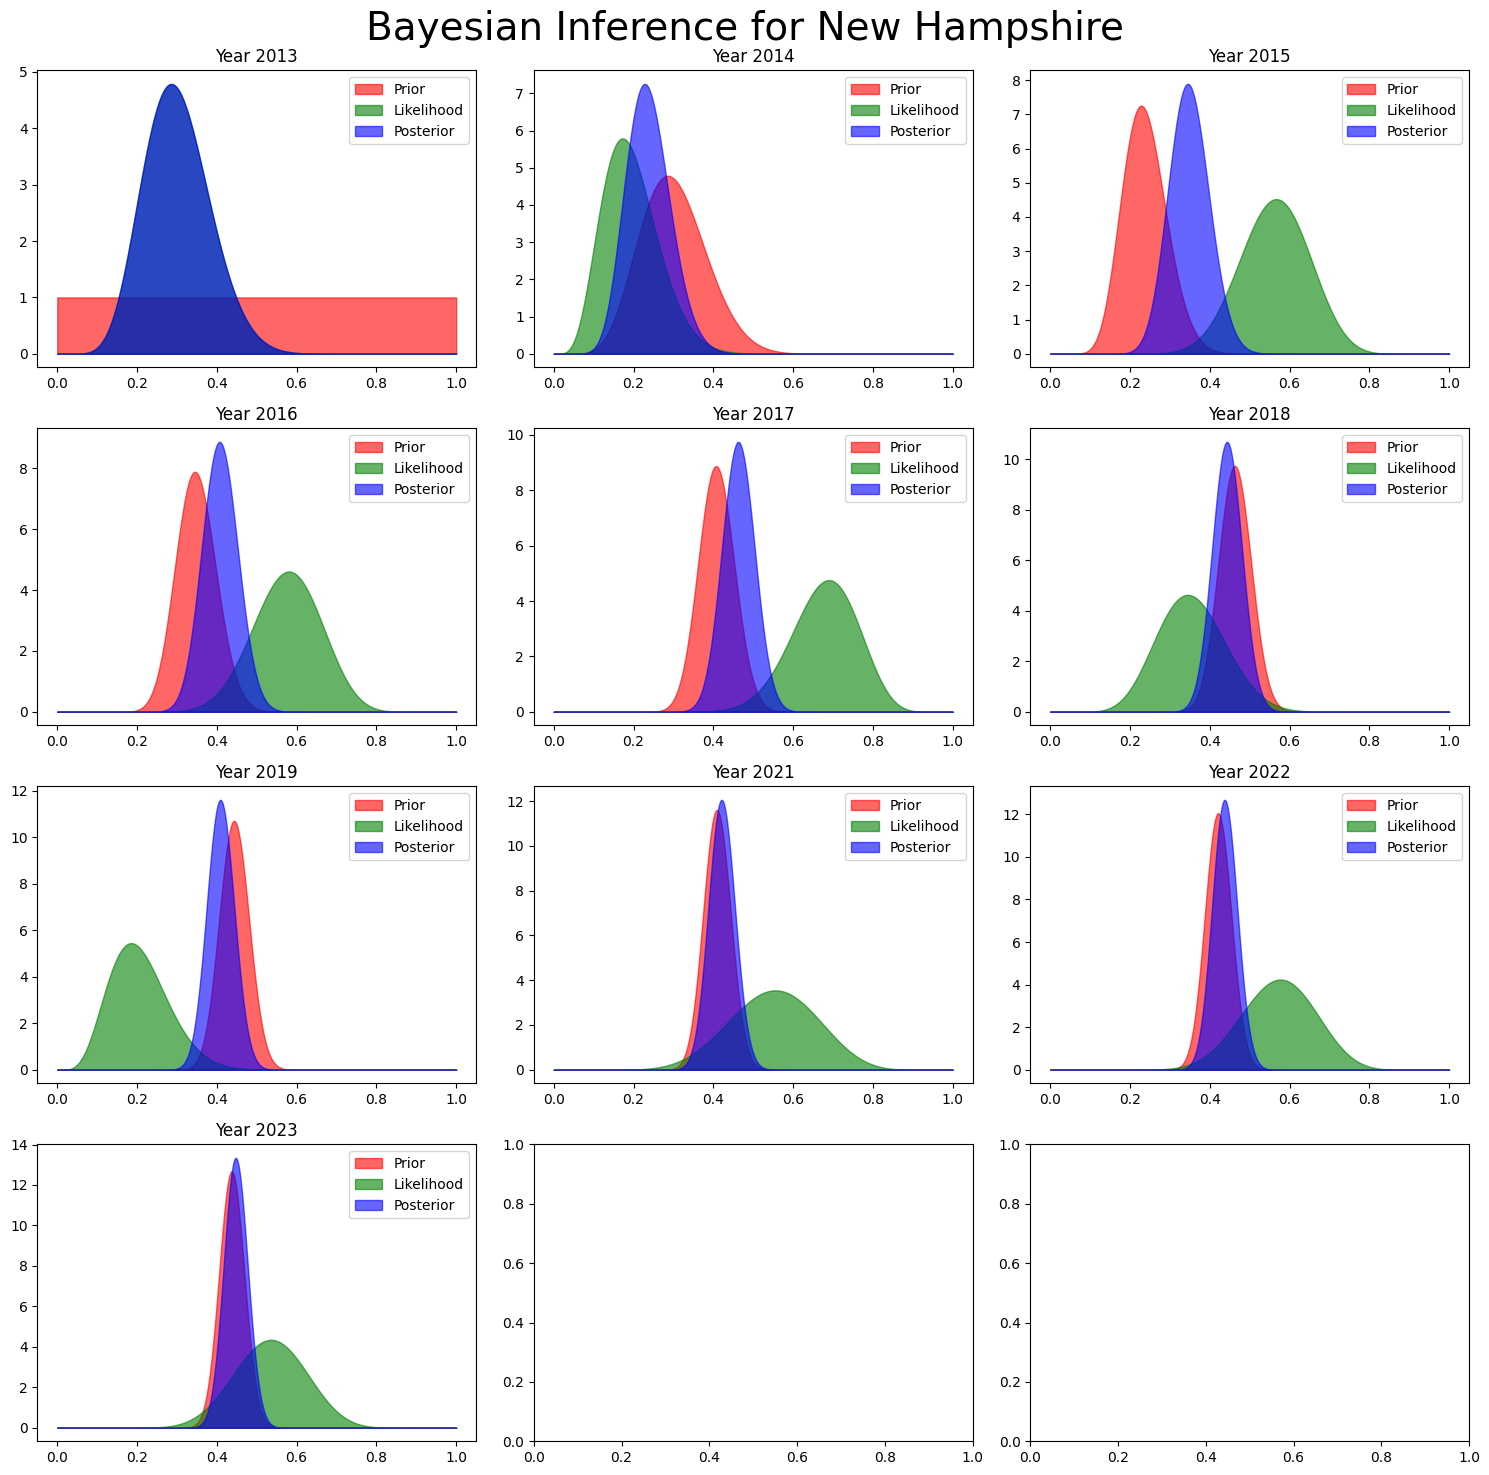

In [9]:
# Prior alpha and beta
alpha_prior, beta_prior = 1, 1

# Get years
years = data["YEAR"].unique()
years.sort()

# Pi grid
num_points = 1000
pi_grid = np.linspace(0, 1, num_points)

alpha = .6

fig, ax = plt.subplots(4, 3, figsize=(15, 15))
ax = ax.flatten()
fig.suptitle(f"Bayesian Inference for {team}", fontsize=28)

for i, year in enumerate(years):

  # plt.figure(figsize=(5, 4))

  # Plot prior
  prior_vals = st.beta.pdf(pi_grid, alpha_prior, beta_prior)
  ax[i].set_title(f"Year {year}")
  ax[i].fill_between(pi_grid, prior_vals, label="Prior", color="red", alpha=alpha)
  
  # Get current year data
  filt = (data["TEAM"] == team) & (data["YEAR"] == year)
  wins = data[filt]["W"].sum()
  games = data[filt]["G"].sum()

  # Plot likelihood
  likelihood = st.binom.pmf(wins, games, pi_grid)
  likelihood *= num_points / likelihood.sum()
  ax[i].fill_between(pi_grid, likelihood, label="Likelihood", color="green", alpha=alpha)

  # Compute posterior alpha and beta
  alpha_post = alpha_prior + wins
  beta_post = beta_prior + games - wins

  # Plot posterior
  post_vals = st.beta.pdf(pi_grid, alpha_post, beta_post)
  ax[i].fill_between(pi_grid, post_vals, label="Posterior", color="blue", alpha=alpha)
  ax[i].legend()

  # Update prior alpha and beta
  alpha_prior, beta_prior = alpha_post, beta_post

plt.tight_layout()
plt.show()

## Confidence Interval

Confidence interval with confidence level $\alpha$ is $(c, c')$ such that:

$$ \mathbb{P}(\pi \in (c, c')) = \alpha $$

For a beta distribution with cdf $F$, $100\alpha\%$ confidence interval is:

$$
c = F^{-1}\left(\frac{1 - \alpha}{2}\right) \qquad c' =F^{-1}\left(\frac{1 + \alpha}{2}\right)
$$

95.0% Confidence Interval: (0.3896, 0.5064)


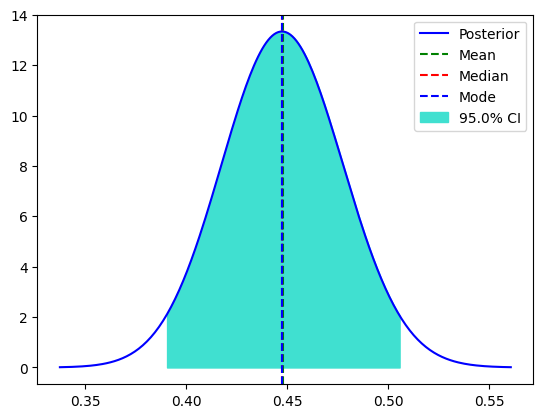

In [10]:
post_vals = st.beta.pdf(pi_grid, alpha_post, beta_post)
filt = post_vals > 1e-2
grid = pi_grid[filt]
post_vals = post_vals[filt]

mean = alpha_post / (alpha_post + beta_post)
median = st.beta.ppf(.5, alpha_post, beta_post)
mode = (alpha_post - 1) / (alpha_post + beta_post - 2)

confidence = .95

lower_bound = st.beta.ppf((1 - confidence) / 2, alpha_post, beta_post)
upper_bound = st.beta.ppf((1 + confidence) / 2, alpha_post, beta_post)
ci_filt = (grid > lower_bound) & (grid < upper_bound)

plt.plot(grid, post_vals, label="Posterior", color="blue")
plt.axvline(mean, label="Mean", color="green", linestyle="--")
plt.axvline(median, label="Median", color="red", linestyle="--")
plt.axvline(mode, label="Mode", color="blue", linestyle="--")
plt.fill_between(
  grid, post_vals, where=ci_filt,
  label=f"{100 * confidence}% CI", color="turquoise"
)

print(
  f"{100 * confidence}% Confidence Interval: "
  f"({round(lower_bound, flt_prec)}, {round(upper_bound, flt_prec)})"
)

plt.legend()
plt.show()